In [1]:
import numpy as np 
import pandas as pd
import os 

In [35]:
def fetch_data():
    path = os.path.join('C:/Users/ibrah/Downloads','MiningProcess_Flotation_Plant_Database.csv')
    return pd.read_csv(path)
data = fetch_data()


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [40]:
data = data.replace(',','.', regex=True)
data.iloc[:, 1:] = data.iloc[:, 1:].astype(float)
data.iloc[:, 0] = data.iloc[:, 0].astype('datetime64[s]')


C:\Users\ibrah\AppData\Local\Temp\ipykernel_4284\3552562301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(',','.', regex=True)


In [56]:
data.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,fe_concentrate_cat,si_concentrate_cat,stratify_column
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,424.954,443.558,502.255,446.370,523.344,66.91,1.31,rich,low,rich_low
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,432.939,448.086,496.363,445.922,498.075,66.91,1.31,rich,low,rich_low


In [48]:
data['date'].value_counts()

date
2017-06-16 15:00:00    180
2017-06-16 16:00:00    180
2017-07-14 18:00:00    180
2017-07-14 19:00:00    180
2017-07-14 20:00:00    180
                      ... 
2017-05-19 11:00:00    180
2017-05-19 12:00:00    180
2017-05-19 13:00:00    180
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: count, Length: 4097, dtype: int64

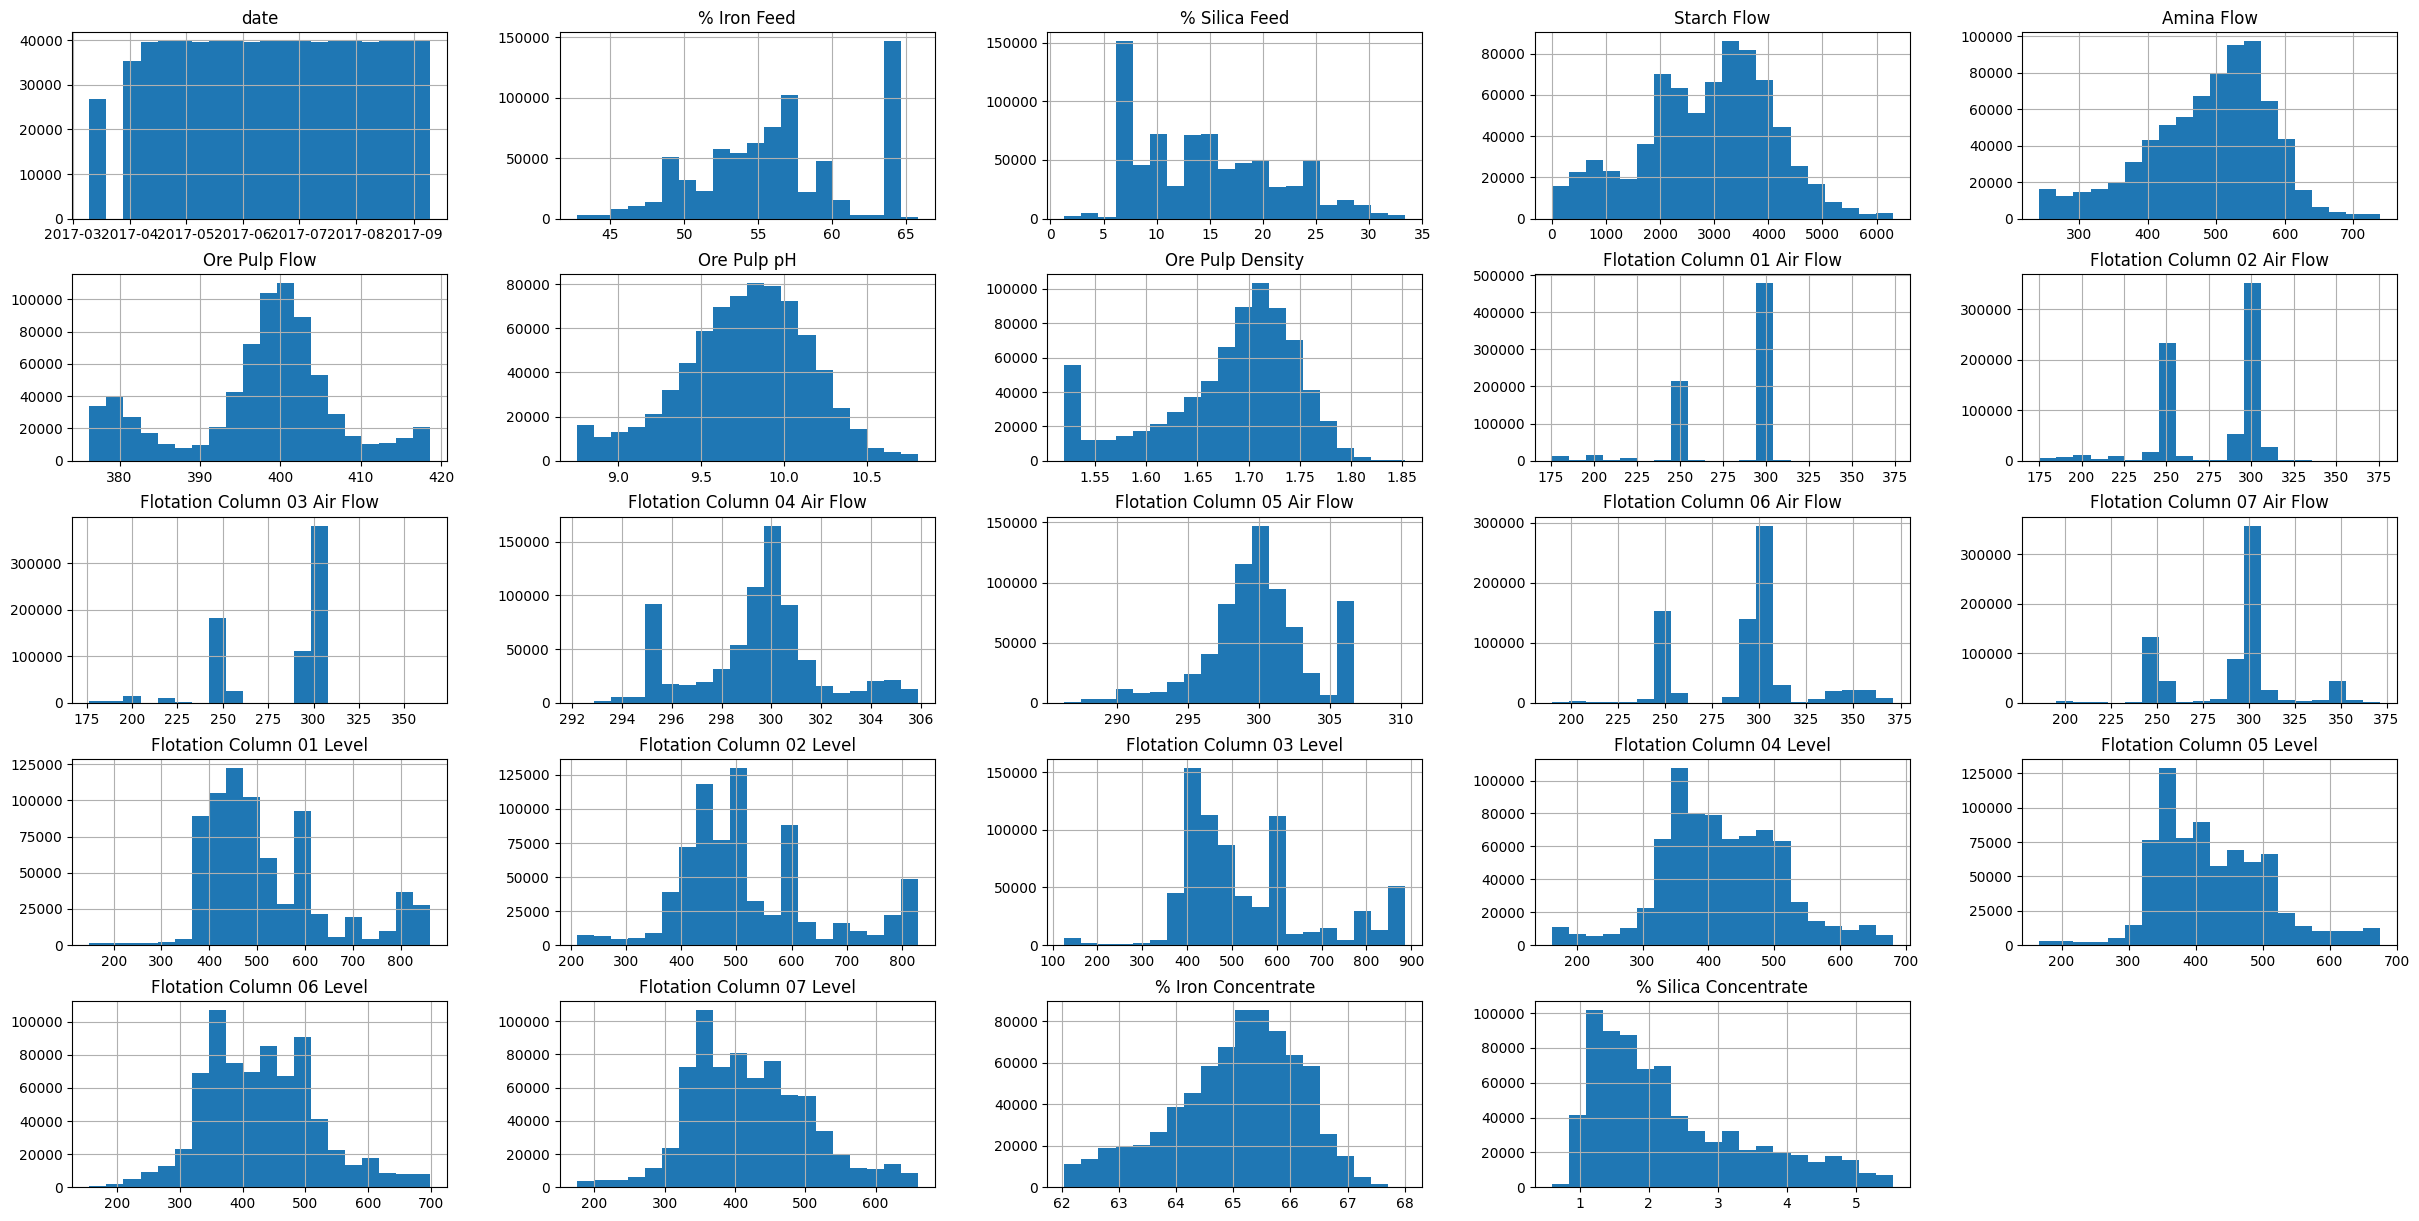

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(30,15))
plt.show()

In [50]:
data['fe_concentrate_cat'] = pd.cut(data['% Iron Concentrate'], bins=[6.2,6.4,6.6,np.inf], labels=['low','meduim','rich'])
data['si_concentrate_cat'] = pd.cut(data['% Silica Concentrate'], bins=[0,2,4,np.inf], labels=['low','meduim','rich'])

In [67]:
data = data.rename(columns={'% Iron Concentrate':'iron_concentrate','% Silica Concentrate':'silica_concentrate'})

In [68]:
data['stratify_column'] = data['fe_concentrate_cat'].astype(str)+'_'+data['si_concentrate_cat'].astype(str)

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data,data['stratify_column']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [78]:
for set_ in (train,test):
    set_.drop(columns=['fe_concentrate_cat','si_concentrate_cat','stratify_column'], axis=1, inplace=True)

In [85]:
for set_ in (train,test):
    set_.drop(columns=['date'], axis=1, inplace=True)

In [86]:
train.head(2)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,iron_concentrate,silica_concentrate
659191,59.21,9.69,3573.46,390.729,378.263842,9.55076,1.71813,300.366,297.163,248.758,...,298.141,486.968,491.131,464.712000,557.889,359.629,617.547,576.098,64.00,1.37
233231,64.03,6.26,3810.59,440.215,402.911000,9.75289,1.68413,250.581,253.521,250.788,...,300.552,448.090,441.689,139.667874,343.641,328.680,327.913,323.427,65.32,1.12


In [ ]:
y_train = train[['iron_concentrate','silica_concentrate']]
x_train = train.drop(columns=['iron_concentrate','silica_concentrate'])

In [95]:
y_test = test[['iron_concentrate','silica_concentrate']]
x_test = test.drop(columns=['iron_concentrate','silica_concentrate'])

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor
pipeline = Pipeline([
    ('std', StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
])
x_train_prepared = pipeline.fit_transform(x_train)

In [ ]:
sgd = MultiOutputRegressor(SGDRegressor(max_iter=10000, penalty='l1',alpha=0.3, loss='squared_error', learning_rate='adaptive'))
sgd.fit(x_train_prepared, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score
x_test_prepared = pipeline.fit_transform(x_test)
sgd_prediction = sgd.predict(x_test_prepared)
error = mean_squared_error(y_test, sgd_prediction)
error = np.sqrt(error)
error